In [1]:
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import numpy as np
import random
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay, ConvexHull
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

In [2]:
def observabledomain(cos_theta_i,cos_theta_r):
    if cos_theta_i >= 0 and cos_theta_r >= 0:
        return 1
    else:
        return 0    
def deltapeak(x,sigma):
    delta = np.exp(-(x)**2/(2*sigma))/np.sqrt(2*np.pi*sigma)
    return delta

def format_func(value, tick_number):
    # find number of multiples of pi/6
    N = int(np.round(6 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/6$"
    elif N == 2:
        return r"$2\pi/6$"
    elif N == 3:
        return r"$3\pi/6$"
    elif N == 4:
        return r"$4\pi/6$"
    elif N == 5:
        return r"$5\pi/6$"
    elif N == 6:
        return r"$\pi$"
    elif N % 6 > 0:
        return r"${0}\pi/6$".format(N)
    else:
        return r"${0}\pi$".format(N // 6)

In [3]:
res = 5
N_phi = 2*res
N_theta = res
N_alpha = 100


sigma = 0.001
nwater = 1.33
epsilon = 0.000000001
Lamb = np.zeros((N_alpha,2*res**2))
Lambcheck = np.zeros((N_alpha,2*res**2))
Opp1 = np.zeros((N_alpha,2*res**2))
Opp2 = np.zeros((N_alpha,2*res**2))
Lommel = np.zeros((N_alpha,2*res**2))





delta_phi = np.pi/res
delta_theta = np.pi/res
delta_Omega = delta_phi*delta_theta


In [4]:
alpha = np.linspace(0,np.pi,N_alpha)
m = 0

for i in range(N_alpha):
    i_hat = np.array([np.cos(alpha[i]),np.sin(alpha[i]),0])
    r_hat = np.array([1,0,0])
    print(str(i+1)+' /'+str(N_alpha))

    for j in range(2*res**2):
        phi = math.floor(j/res)*delta_phi
        theta = (j%res)*delta_theta
        s_hat = np.array([np.cos(phi)*np.sin(theta),np.sin(phi)*np.sin(theta),np.cos(theta)])


        cos_theta_i = np.inner(i_hat,s_hat)
        theta_i = np.arccos(cos_theta_i)
        

        cos_theta_r = np.inner(r_hat,s_hat)
        theta_r = np.arccos(cos_theta_r)


        p1 = np.cross(i_hat,s_hat)/(np.linalg.norm(np.cross(i_hat,s_hat))+epsilon) #epsilon to ensure norm(p1)<1
        

        p2 = np.cross(r_hat,s_hat)/(np.linalg.norm(np.cross(r_hat,s_hat))+epsilon)
        


        cos_psi = np.inner(p1,p2)
        
        
        psi = np.arccos(cos_psi)

        Rs = abs((np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/(np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2
        Rp = abs(((nwater**2)*np.cos(theta_i)-np.sqrt(nwater**2-np.sin(theta_i)**2))/((nwater**2)*np.cos(theta_i)+np.sqrt(nwater**2-np.sin(theta_i)**2)))**2

        Lamb[i][j]    = 4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega/np.pi
        Opp1[i][j]    = 4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega*deltapeak(theta_i-theta_r,sigma)*deltapeak(psi-np.pi,sigma)/(np.sin(theta_r)*np.cos(theta_r)+epsilon)
        Opp2[i][j]    = Opp1[i][j]*(Rs+Rp)/2

        Lommel[i][j]  = np.abs(4*observabledomain(cos_theta_i,cos_theta_r)*cos_theta_i*cos_theta_r*np.sin(theta)*delta_Omega*2/(3*np.pi**2)*(np.sin(alpha[i])+(np.pi-alpha[i])*np.cos(alpha[i]))/(np.cos(theta_i)+np.cos(theta_r)+epsilon))


1 /100
2 /100
3 /100
4 /100
5 /100
6 /100
7 /100
8 /100
9 /100
10 /100
11 /100
12 /100
13 /100
14 /100
15 /100
16 /100
17 /100
18 /100
19 /100
20 /100
21 /100
22 /100
23 /100
24 /100
25 /100
26 /100
27 /100
28 /100
29 /100
30 /100
31 /100
32 /100
33 /100
34 /100
35 /100
36 /100
37 /100
38 /100
39 /100
40 /100
41 /100
42 /100
43 /100
44 /100
45 /100
46 /100
47 /100
48 /100
49 /100
50 /100
51 /100
52 /100
53 /100
54 /100
55 /100
56 /100
57 /100
58 /100
59 /100
60 /100
61 /100
62 /100
63 /100
64 /100
65 /100
66 /100
67 /100
68 /100
69 /100
70 /100
71 /100
72 /100
73 /100
74 /100
75 /100
76 /100
77 /100
78 /100
79 /100
80 /100
81 /100
82 /100
83 /100
84 /100
85 /100
86 /100
87 /100
88 /100
89 /100
90 /100
91 /100
92 /100
93 /100
94 /100
95 /100
96 /100
97 /100
98 /100
99 /100
100 /100


In [5]:
A = np.ones(2*res**2)

lamb_curve = np.matmul(Lamb,A)
#normcheck_curve = np.matmul(normcheck,A)
lambertian_analytical = 8/(3*np.pi)*(np.sin(alpha)+(np.pi-alpha)*np.cos(alpha))
##
##
opp1_curve = np.matmul(Opp1,A)
opp2_curve = np.matmul(Opp2,A)
##
##wp = 20
##
##opp1_curve[:wp] = [1]*wp
##opp2_curve[:wp] = [0]*wp
lommel_curve = np.matmul(Lommel,A)

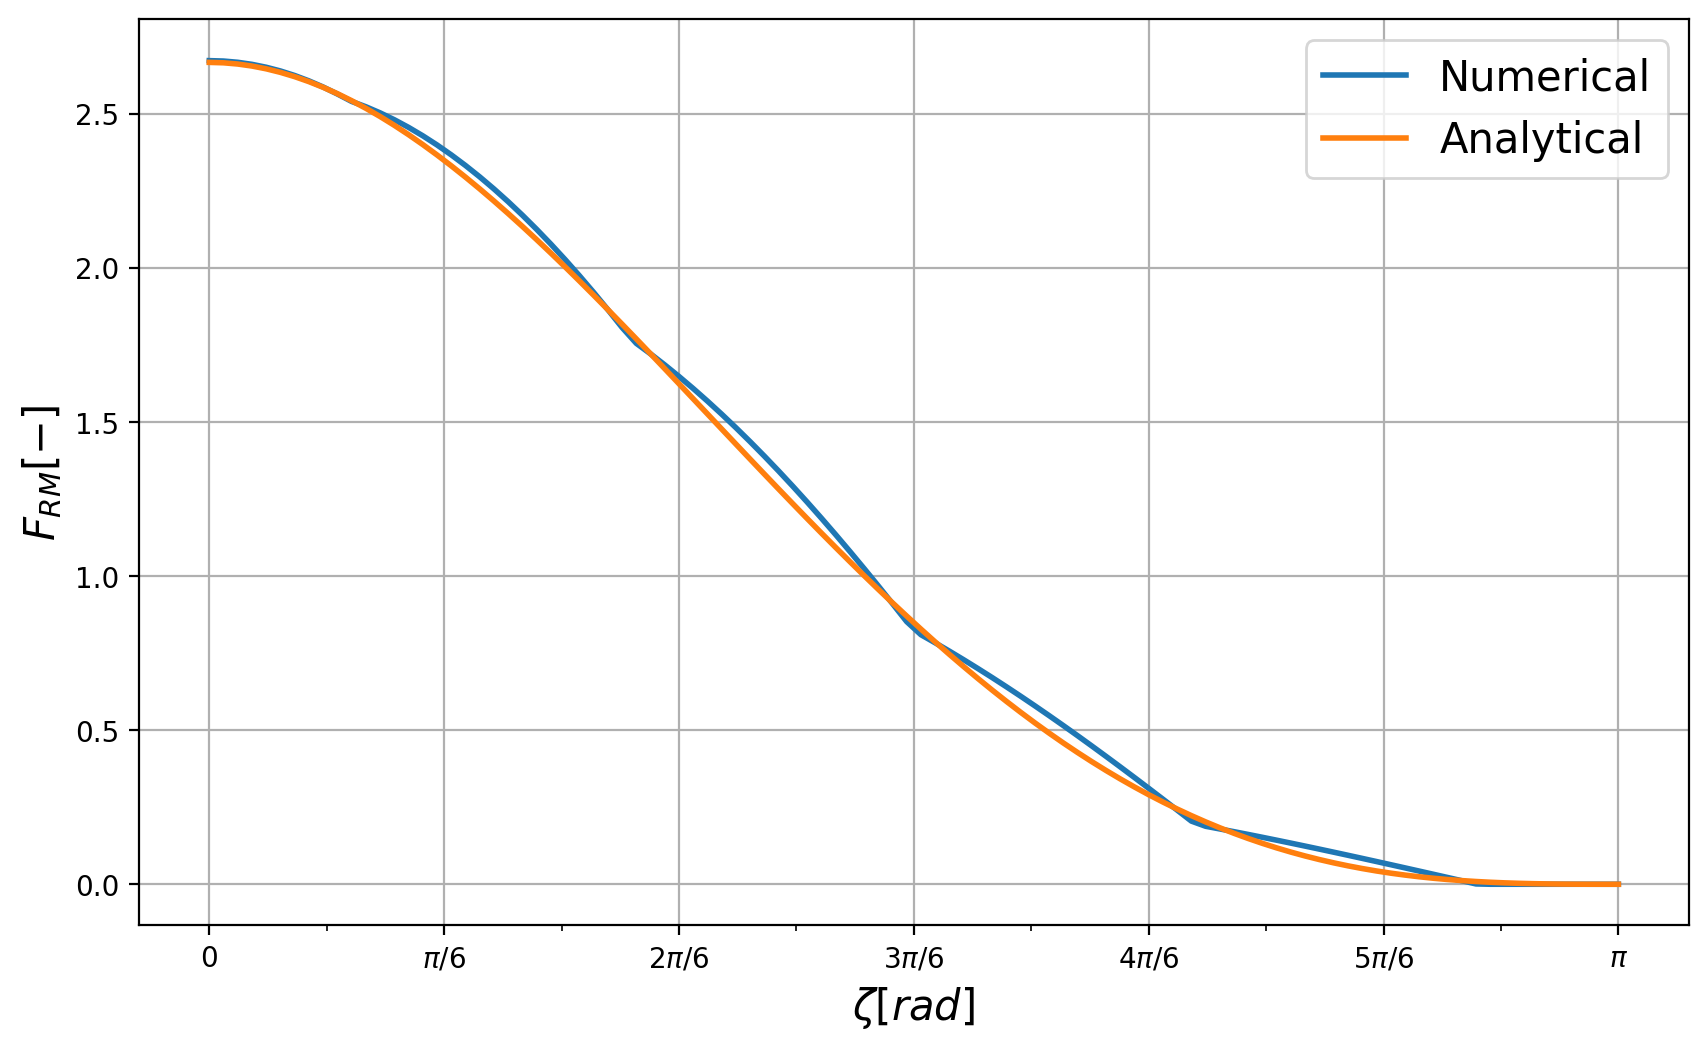

In [19]:
%matplotlib inline
f,ax=plt.subplots(figsize=(10,6), dpi=200)
##ax.plot(alpha,normcheck_curve, label= 'Unity')
ax.plot(alpha,lamb_curve, linewidth = 2, label= 'Numerical')
ax.plot(alpha, lambertian_analytical, linewidth = 2,  label= 'Analytical')
##ax.plot(alpha,lamb_curve/2, label= 'Lambertian/2')


#ax.plot(alpha, opp1_curve, label= 'Metallic glint')
#ax.plot(alpha, opp2_curve, label= 'Water glint (Fresnel)')
#ax.plot(alpha, lommel_curve, label= 'Lommel-Seeliger')
plt.xlabel('$\zeta [rad]$',fontsize = 15)
plt.ylabel('$F_{RM} [-]$',fontsize = 15)
#plt.title('Phase function')
plt.legend(prop={'size': 15})
plt.grid()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 6))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


plt.show()